## Fashion-MNIST problem (Task 1/Objective 2)
For the second objective, we design a model with 3 convolutional layers with 5-fold cross validation

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Mount google drive to save the dataset and results
from google.colab import drive
drive.mount('/content/drive')

2.8.0
Mounted at /content/drive


## Import the Fashion MNIST dataset

In [2]:
# The dataset is imporetd from keras datasets
fashion_mnist = tf.keras.datasets.fashion_mnist
# load_data returnstwo tuples that contain the training and test data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# List of class categories
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

The training set contains 60,000 images with each image represented as 28 x 28 pixels

In [4]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

## Preprocess the data

A view of first image of dataset before preprocessing

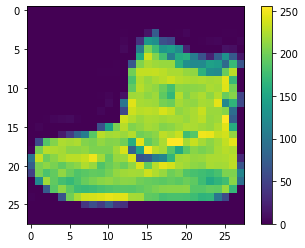

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

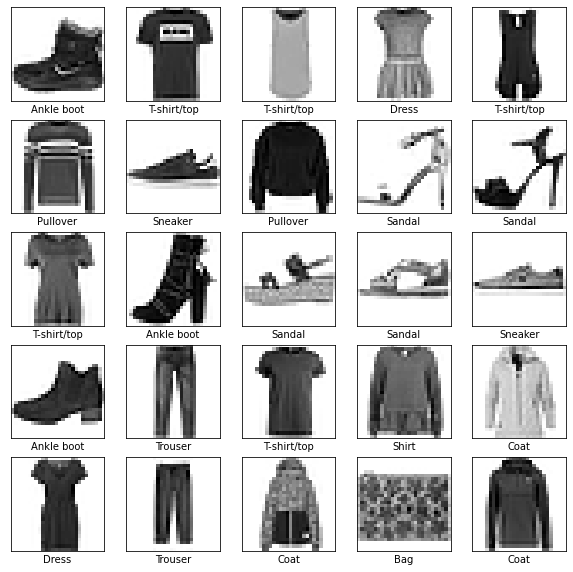

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

We define a function to call it during the 5-fold cross validation

In [12]:
def build_model():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D(2, 2))
  model.add(layers.Conv2D(64, (3 ,3), activation='relu'))
  model.add(layers.MaxPooling2D(2, 2))
  model.add(layers.Conv2D(64, (3 ,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10))
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

### Feed the model

We employ a "for" loop to create the folds and feed the model with training and validation data

In [ ]:
k = 5
num_val_samples = len(train_images) // k
num_epochs = 20
all_loss_histories = []
all_val_loss_histories = []
all_acc_histories = []
all_val_acc_histories = []

for i in range(k):
  val_images = train_images[i*num_val_samples:(i+1)*num_val_samples]
  val_labels = train_labels[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_images = np.concatenate(
      [train_images[:i*num_val_samples],
      train_images[(i+1)*num_val_samples:]], axis = 0)
  partial_train_labels = np.concatenate(
      [train_labels[:i*num_val_samples],
      train_labels[(i+1)*num_val_samples:]], axis = 0)
  
  model = build_model()
  history = model.fit(partial_train_images, partial_train_labels,
                      validation_data = (val_images, val_labels),
                      epochs = num_epochs, verbose = 0)
  all_loss_histories.append(history.history['loss'])
  all_val_loss_histories.append(history.history['val_loss'])
  all_acc_histories.append(history.history['accuracy'])
  all_val_acc_histories.append(history.history['val_accuracy'])



The accuracy of model in 20 epochs

In [14]:
all_acc_histories[-1]

[0.8125,
 0.879854142665863,
 0.8964791893959045,
 0.9077083468437195,
 0.9181458353996277,
 0.9252291917800903,
 0.9325208067893982,
 0.937458336353302,
 0.9432916641235352,
 0.9486666917800903,
 0.9526041746139526,
 0.9572916626930237,
 0.9599999785423279,
 0.963979184627533,
 0.9676041603088379,
 0.9693333506584167,
 0.9730416536331177,
 0.9746249914169312,
 0.9765625,
 0.9772708415985107]

We use from list comprehension to calculate the average loss training and validation

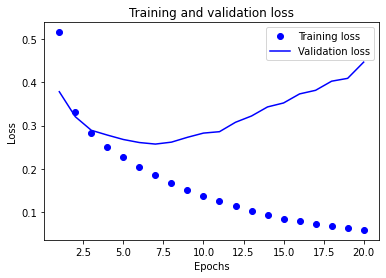

In [19]:
# The average value of training loss in 20 epochs
avg_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
# The average value of validation loss in 20 epochs
avg_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]

epochs = range(1, len(avg_loss_history) + 1)

plt.plot(epochs, avg_loss_history, 'bo', label='Training loss')
plt.plot(epochs, avg_val_loss_history, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We use from list comprehension to calculate the average accuracy training and validation

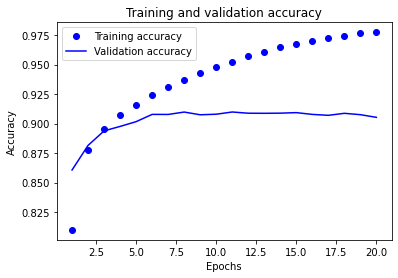

In [18]:
# The average value of training accuracy in 20 epochs
avg_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
# The average value of validation accuracy in 20 epochs
avg_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

epochs = range(1, len(avg_acc_history) + 1)

plt.plot(epochs, avg_acc_history, 'bo', label='Training accuracy')
plt.plot(epochs, avg_val_acc_history, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5226 - accuracy: 0.8913 - 1s/epoch - 4ms/step

Test accuracy: 0.8913000226020813


The model fitting after choosing the early stop value

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, verbose=0)
history.history.get('accuracy')[-1]

0.9424499869346619

Saving the model in Google drive

In [21]:
model.save('saved_model/Task1_2.h5')

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([1.3835326e-08, 2.7011181e-11, 2.6019606e-10, 5.6872784e-11,
       1.2070331e-08, 4.1874609e-04, 1.1151612e-08, 5.7000564e-03,
       8.1178889e-08, 9.9388099e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

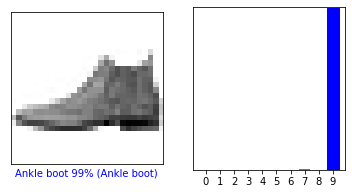

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

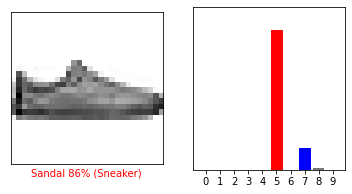

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

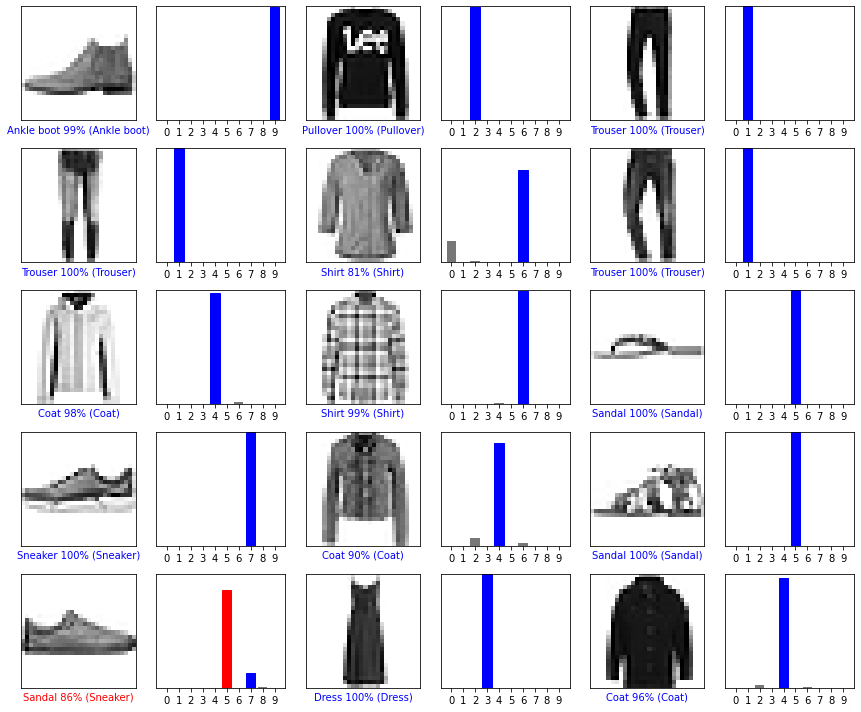

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.26038831e-06 1.10213664e-13 9.98591125e-01 1.16777841e-08
  1.29609776e-03 2.54965649e-11 1.04560357e-04 7.70050608e-19
  4.55051066e-11 3.53864888e-17]]


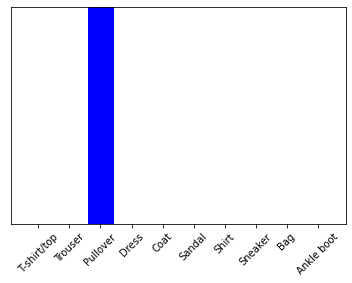

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.